#주제 목표

선형회귀를 이용하여 2021년 코로나 누적 확진자수를 예측



#데이터셋 시각화

코로나에 대한 테이터 셋은 한국 데이터 거래소에서 가지고 왔다.(https://kdx.kr/data/view/25918)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# # #한국어 font다운로드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
#파일 읽기
import csv
import pandas as pd

In [4]:
data = pd.read_csv('21년도코로나.csv')
data

,경과 날짜,날짜,Unnamed: 2,누적확진자
0,1,20210101,NaN,61769
1,2,20210102,NaN,62593
2,3,20210103,NaN,63244
3,4,20210104,NaN,64264
4,5,20210105,NaN,64979
...,...,...,...,...
109,110,20210421,NaN,115926
110,111,20210422,NaN,116661
111,112,20210423,NaN,117458
112,113,20210424,NaN,118243


공공 데이터에서 읽은 데이터를 바탕을 x_data에는 경과날짜를 받아오고 y_data에는 누적 확진자 수 데이터를 받아온다

In [5]:
#x데이터는 날짜
x_data = data["경과 날짜"]
#y데이터는 일별 확진자수
y_data = data["누적확진자"]

#data_set = x,y 배열 생성
data_set = []
for i in np.arange(len(x_data)) :
  data_set.append([x_data[i], y_data[i]])

코로나 누적확진자 수를 확인한다.

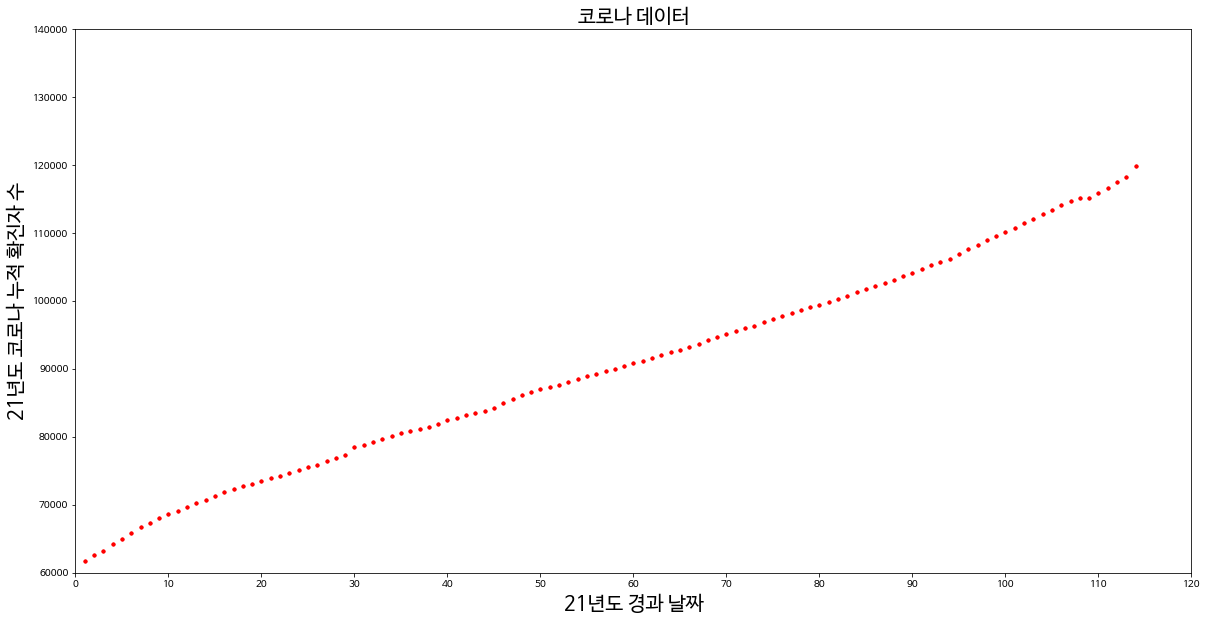

In [6]:
plt.figure(figsize=(20,10))
plt.rc('font', family='NanumBarunGothic')
plt.ylim([60000,140000])
plt.xlim([0,120])
plt.xticks([0, 10, 20,30,40,50,60,70,80,90,100,110, 120])
plt.xlabel('21년도 경과 날짜',fontsize=20)
plt.ylabel('21년도 코로나 누적 확진자 수',fontsize=20)
plt.plot(x_data, y_data, 'ro', markersize = 3)
plt.title('코로나 데이터',fontsize = 20)
for i in np.arange(len(x_data)) :
  plt.plot(data_set[i][0], data_set[i][1],'ro', markersize=3)
plt.show()

# 오차함수 생성 및 시각화

발생 추이 그래프와 오차함수를 만들어 보자

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
X = np.array([x_data])
Y = np.array([y_data])
m = len(X)

In [9]:
#변수를 담자
#직선의 방정식 y = W0 * x + W1라 하자
#Xn 에서의 오차의 제곱은 (Yn - tn)**2 이것의 합에 대하여 함수를 만들어 보자
def mse (x, t, w) :
  y = w[0] * x + w[1] #직선의 방정식
  mse = np.mean((y-t)**2)
  return mse

기울기인 w0, y절편인 w1의 값이 변화에 따라 오차인 J의 크기가 어떻게 달라지는지 확인하자

In [10]:
#w0은 기울기로 누적확진자수는 기울기가 항상 0이상이다.

xn = 100
w0 = [460, 470] # 이전의 그래프 그려봄을 통해 w0의 최솟값은 460~470사이에 있음을 확인하였다.
w1 = [63400, 63500] # 이전의 그래프를 그려봄을 통해 w1의 최솟값은 63400~63500사이에 있음을 확인하였다.
x0 = np.linspace(w0[0], w0[1], xn)
x1 = np.linspace(w1[0], w1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse(x_data, y_data, (x0[i0],x1[i1]))

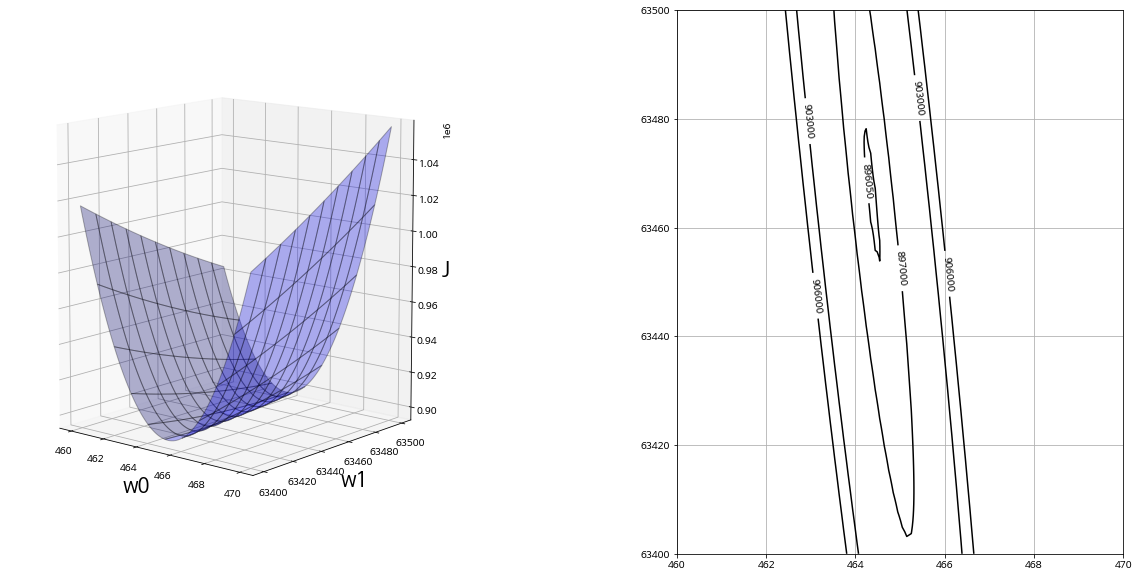

In [11]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1,projection= '3d')
ax.plot_surface(xx0,xx1,J,rstride = 10, cstride = 10, alpha =0.3, color = 'blue', edgecolor = 'black')
ax.set_xlabel("w0",fontsize = 20)
ax.set_ylabel("w1",fontsize = 20)
ax.set_zlabel("J",fontsize = 20)
ax.view_init(10,-50)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0,xx1,J,30,colors = 'black', levels = [896050,897000,903000,906000])
cont.clabel(fmt = '%1.0f',fontsize = 10)
plt.grid(True)
plt.show()


# numpy를 사용한 선형회귀

In [12]:
#polyfit을 이용하여 선형회귀 하기
p1 = np.polyfit(x_data, y_data,1)
p1

array([  464.36073794, 63466.36283186])

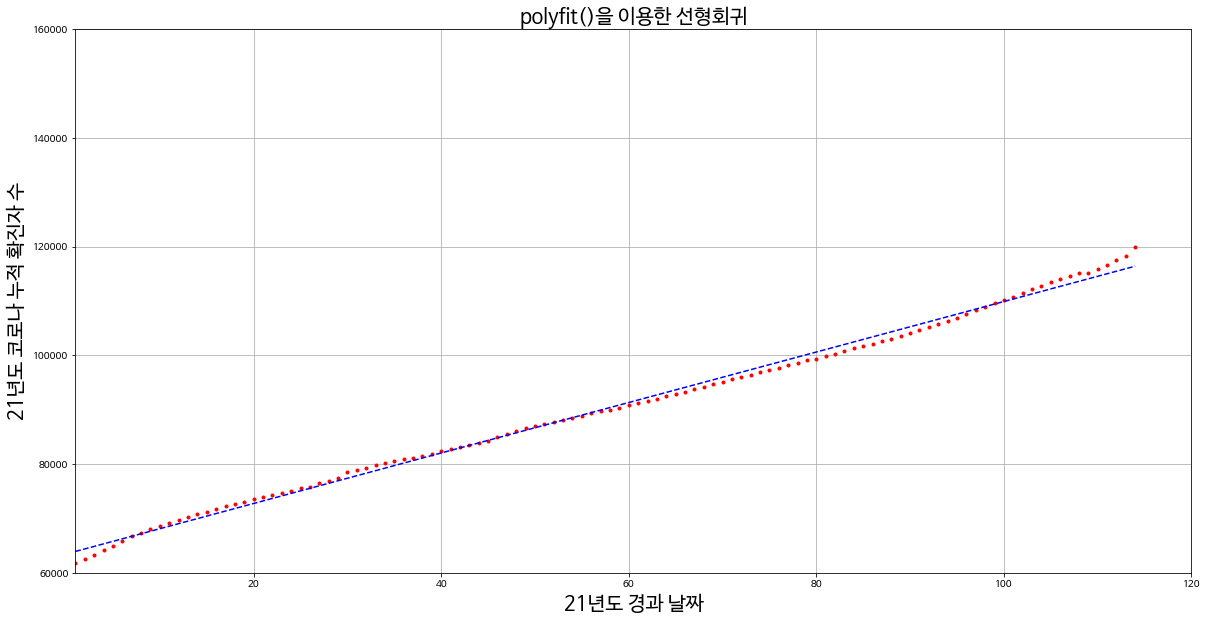

In [29]:
plt.figure(figsize=(20,10))
#plt.plot(x_data,y_data, 'ro', markersize = 3)
plt.rc('font', family='NanumBarunGothic')
plt.ylim([60000,160000])
plt.xlim([1,120])
plt.xlabel('21년도 경과 날짜',fontsize=20)
plt.ylabel('21년도 코로나 누적 확진자 수',fontsize=20)
plt.plot(x_data, y_data, 'ro', markersize = 3)
plt.plot(x_data, np.polyval(p1,x_data), 'b--')
plt.title('polyfit()을 이용한 선형회귀',fontsize = 20)
plt.grid()

In [14]:
#polyfit()을 이용하여 21년 12월 31일 코로나 누적확진자 수 예측
np.round(p1[0]*365+p1[1])

232958.0

In [15]:
#오차 제곱
mse(X, Y,[464.36073794, 63466.36283186])

896009.3125755804

# Tensorflow를 이용한 선형 회귀

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 회 진행중
기울기:  [1925.0535] y절편:  [25.415962]
직선의 방정식:  y =  [1925.0535] *x + [25.415962]
오차제곱:  2733688861.5018644


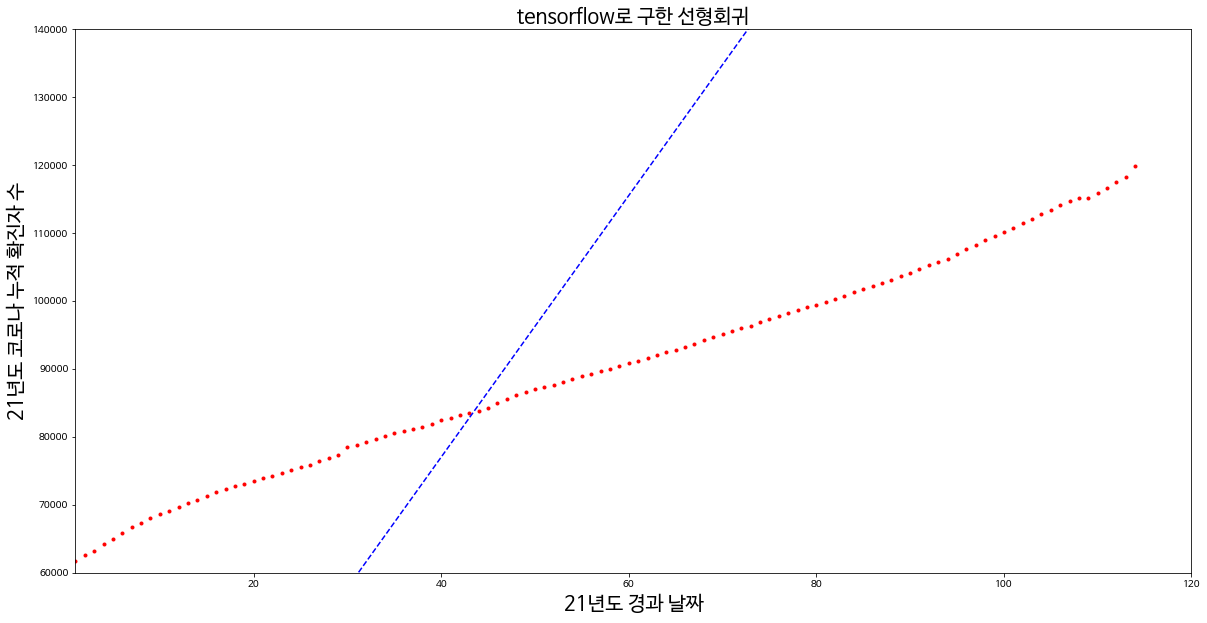

10000 회 진행중
기울기:  [774.2334] y절편:  [39814.082]
직선의 방정식:  y =  [774.2334] *x + [39814.082]
오차제곱:  138921411.826489


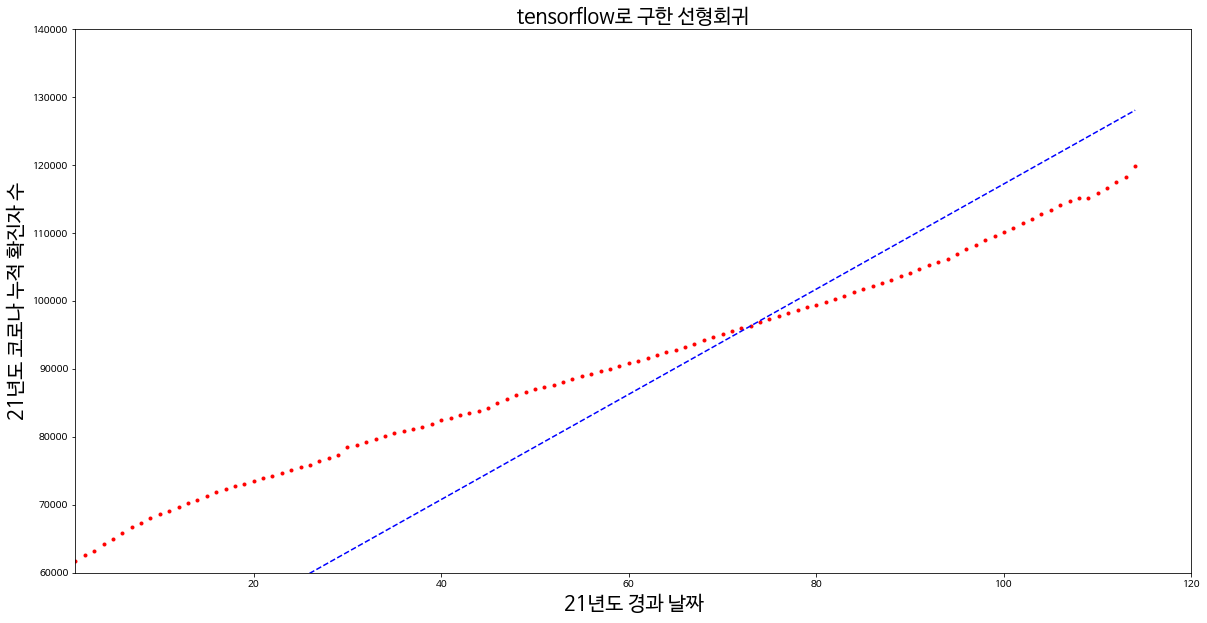

20000 회 진행중
기울기:  [579.8741] y절편:  [54649.34]
직선의 방정식:  y =  [579.8741] *x + [54649.34]
오차제곱:  20076376.449991032


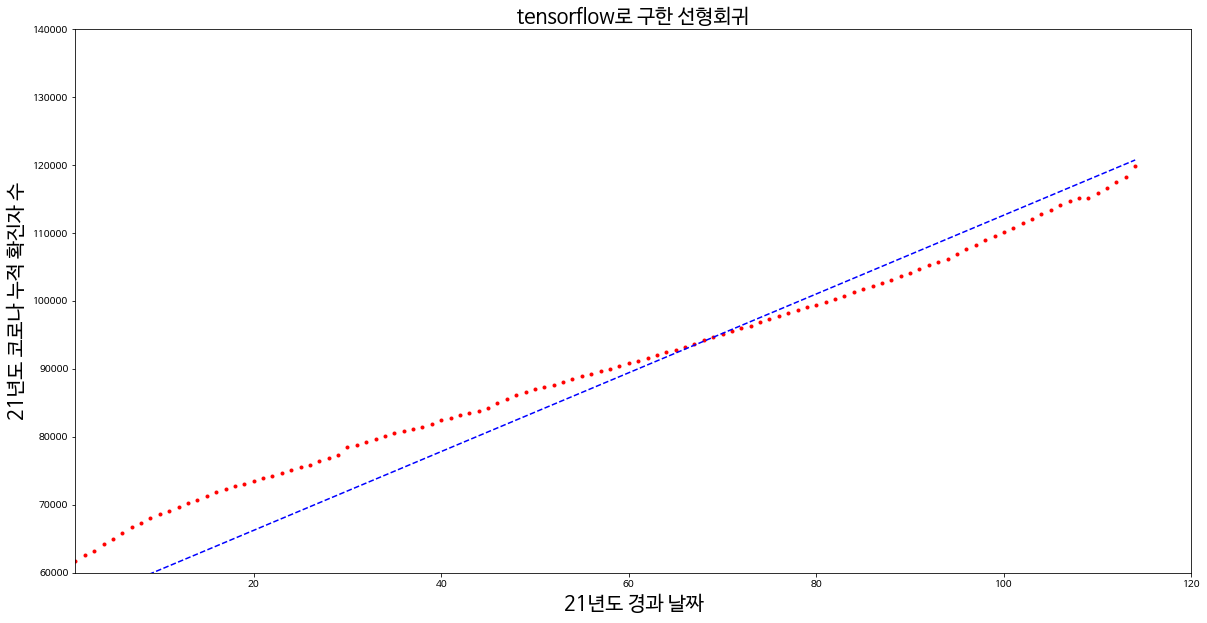

30000 회 진행중
기울기:  [507.42172] y절편:  [60179.56]
직선의 방정식:  y =  [507.42172] *x + [60179.56]
오차제곱:  3561398.589805758


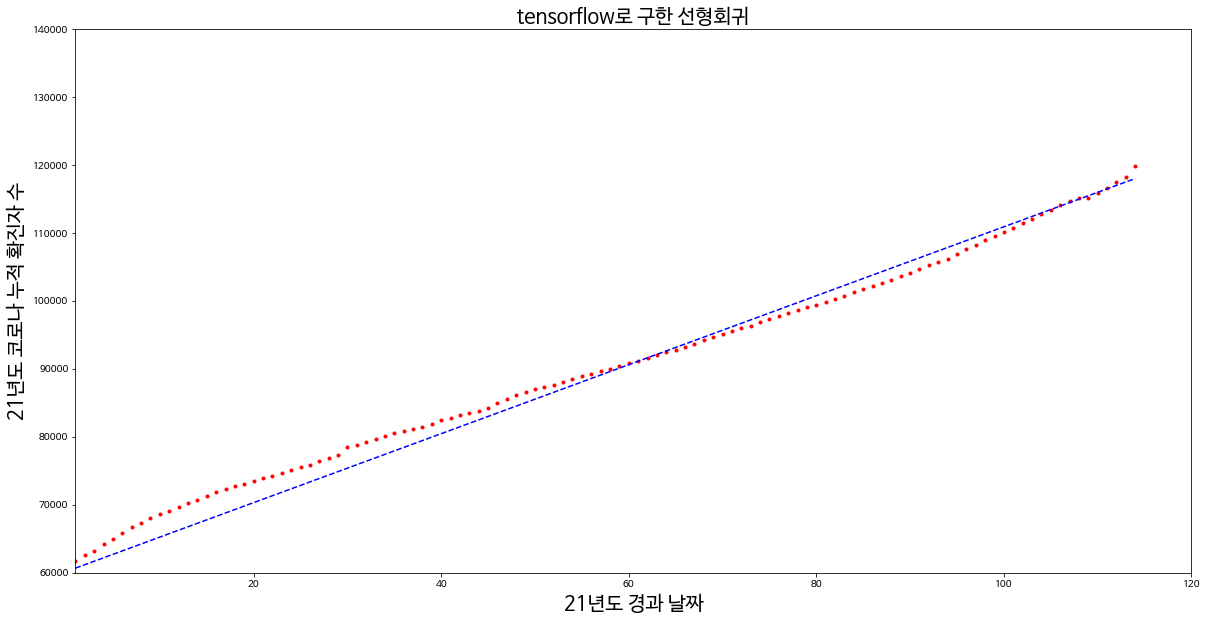

40000 회 진행중
기울기:  [480.41397] y절편:  [62241.035]
직선의 방정식:  y =  [480.41397] *x + [62241.035]
오차제곱:  1266448.9540012924


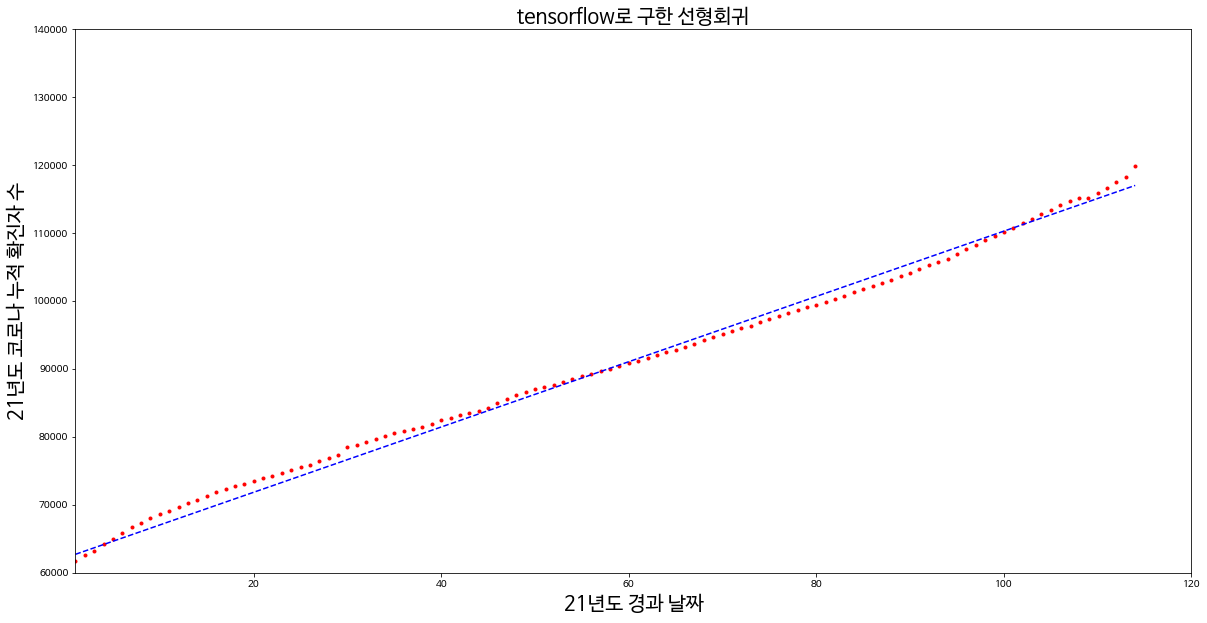

50000 회 진행중
기울기:  [470.34338] y절편:  [63009.715]
직선의 방정식:  y =  [470.34338] *x + [63009.715]
오차제곱:  947458.2094473322


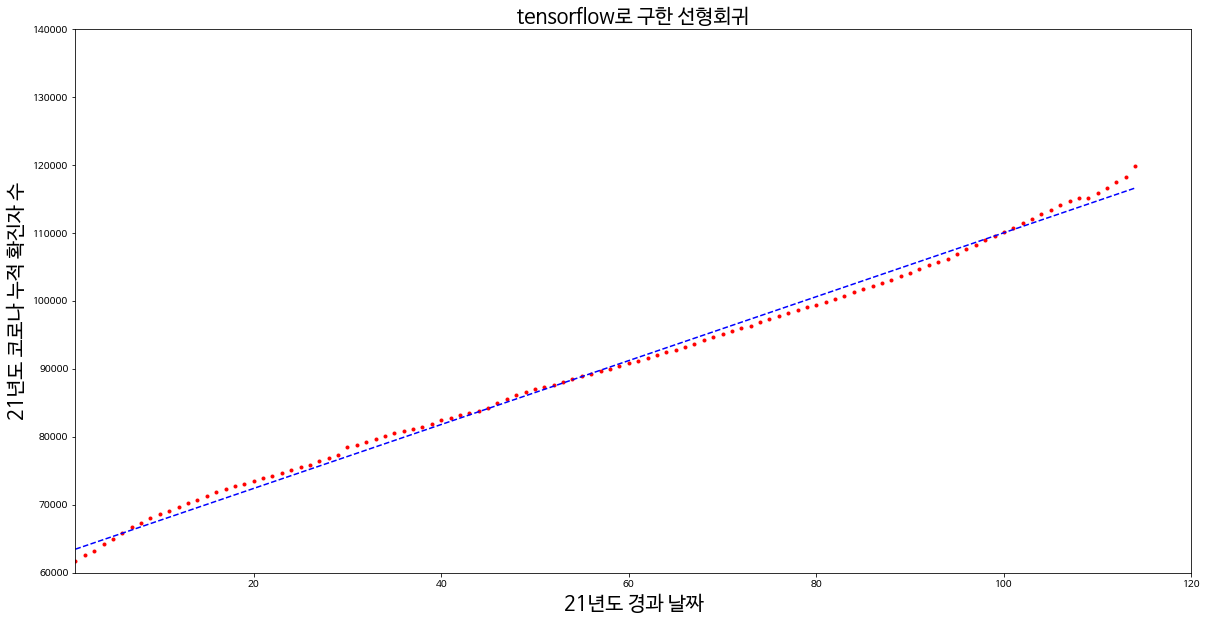

60000 회 진행중
기울기:  [466.5965] y절편:  [63295.707]
직선의 방정식:  y =  [466.5965] *x + [63295.707]
오차제곱:  903194.7808620958


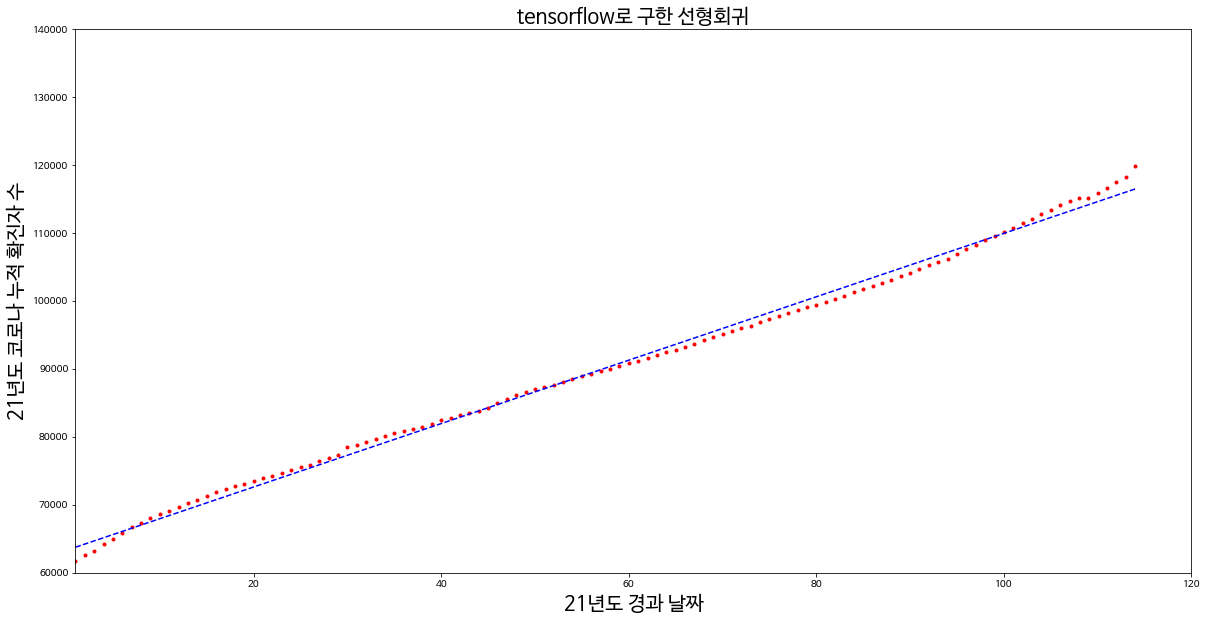

70000 회 진행중
기울기:  [465.18982] y절편:  [63403.082]
직선의 방정식:  y =  [465.18982] *x + [63403.082]
오차제곱:  896997.3124890941


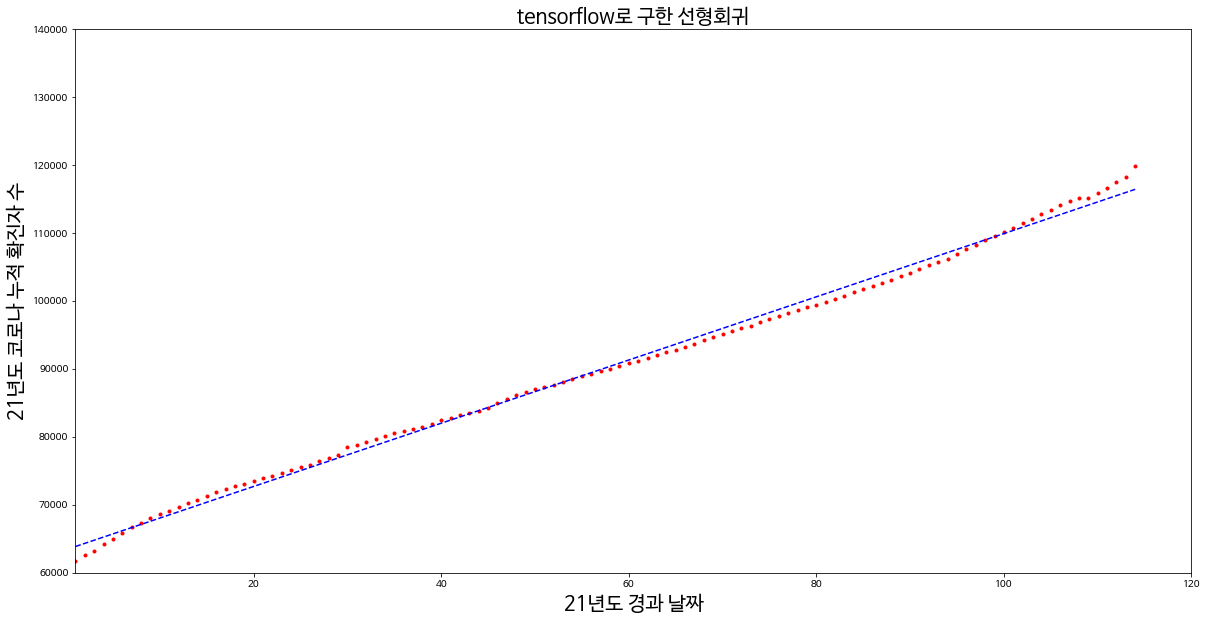

80000 회 진행중
기울기:  [464.65244] y절편:  [63444.098]
직선의 방정식:  y =  [464.65244] *x + [63444.098]
오차제곱:  896131.6234914231


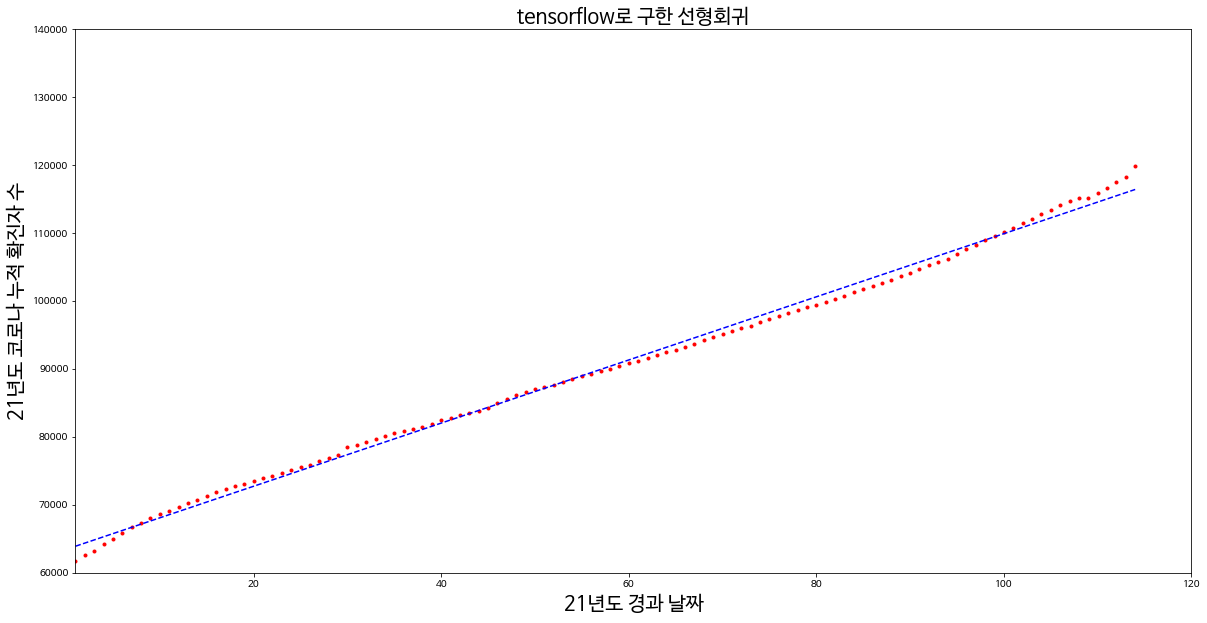

90000 회 진행중
기울기:  [464.6197] y절편:  [63446.598]
직선의 방정식:  y =  [464.6197] *x + [63446.598]
오차제곱:  896105.6986577248


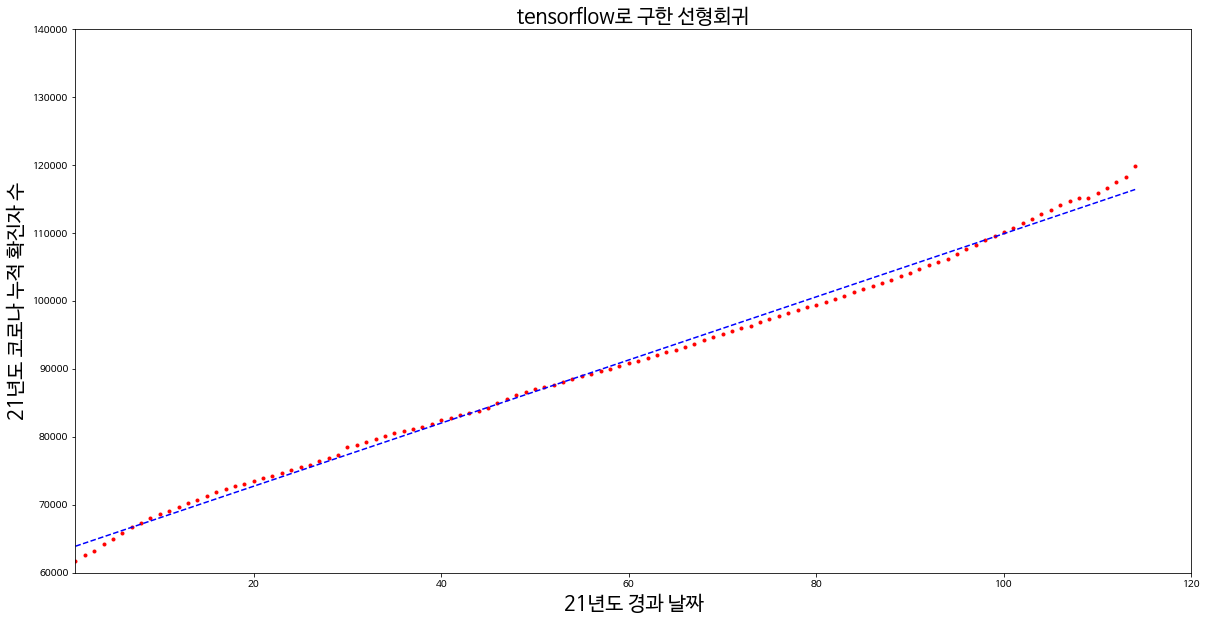

기울기:  [464.61966] y절편:  [63446.598]
직선의 방정식:  y =  [464.61966] *x + [63446.598]
오차제곱:  896105.6986565687


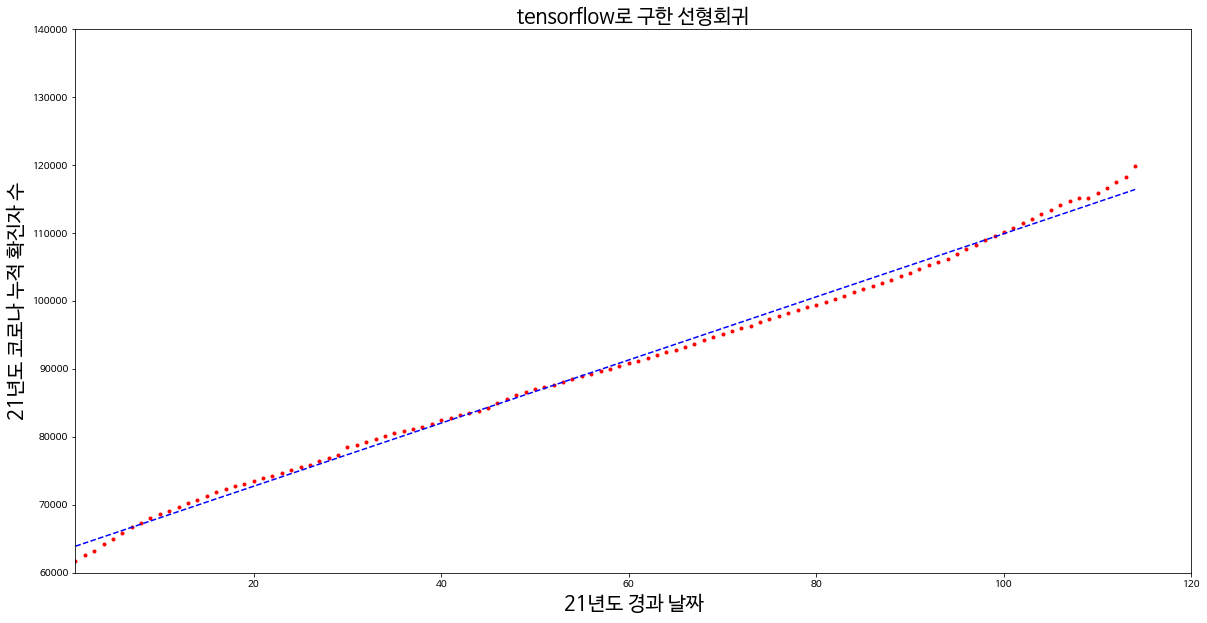

In [16]:
X = np.array(x_data)
Y = np.array(y_data)
m = len(X)


W = tf.Variable(tf.random_uniform([1], 463, 465))
b = tf.Variable(tf.zeros([1]))

hypothesis = W * X + b

loss = tf.reduce_mean(tf.square(hypothesis - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.0002)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


for i in range(100000) :
    sess.run(train)
    if mse(X, Y, [sess.run(W), sess.run(b)]) < 896010 :
      break;
    if i % 10000 == 0 :
      print(i, "회 진행중")
      print("기울기: ", sess.run(W), "y절편: ", sess.run(b))
      print("직선의 방정식:  y = ",sess.run(W),"*x +", sess.run(b))
      print("오차제곱: ", mse(X, Y, [sess.run(W), sess.run(b)]))
      plt.figure(figsize=(20,10))
      plt.title('tensorflow로 구한 선형회귀',fontsize = 20)
      plt.plot(x_data,y_data, 'ro', markersize = 3)
      plt.rc('font', family='NanumBarunGothic')
      plt.ylim([60000,140000])
      plt.xlim([1,120])
      plt.xlabel('21년도 경과 날짜',fontsize=20)
      plt.ylabel('21년도 코로나 누적 확진자 수',fontsize=20)
      plt.plot(x_data, sess.run(W) * x_data + sess.run(b),'b--')
      plt.show()


#그리기
#print(sess.run(loss))
print("기울기: ", sess.run(W), "y절편: ", sess.run(b))
print("직선의 방정식:  y = ",sess.run(W),"*x +", sess.run(b))
print("오차제곱: ", mse(X, Y, [sess.run(W), sess.run(b)]))
plt.figure(figsize=(20,10))
plt.title('tensorflow로 구한 선형회귀',fontsize = 20)
plt.plot(x_data,y_data, 'ro', markersize = 3)
plt.rc('font', family='NanumBarunGothic')
plt.ylim([60000,140000])
plt.xlim([1,120])
plt.xlabel('21년도 경과 날짜',fontsize=20)
plt.ylabel('21년도 코로나 누적 확진자 수',fontsize=20)
plt.plot(x_data, sess.run(W) * x_data + sess.run(b),'b--')
plt.show()

In [17]:
print("21년도 코로나 누적확진자수: ",sess.run(W)*365 + sess.run(b))

21년도 코로나 누적확진자수:  [233032.77]


# 사이킷런을 이용한 선형회귀

결과 확인
기울기:  464.3607379356433 y절편:  63466.36283185841
직선의 방정식:  y =  464.3607379356433 *x + 63466.36283185841
오차 제곱:  896009.3125755799


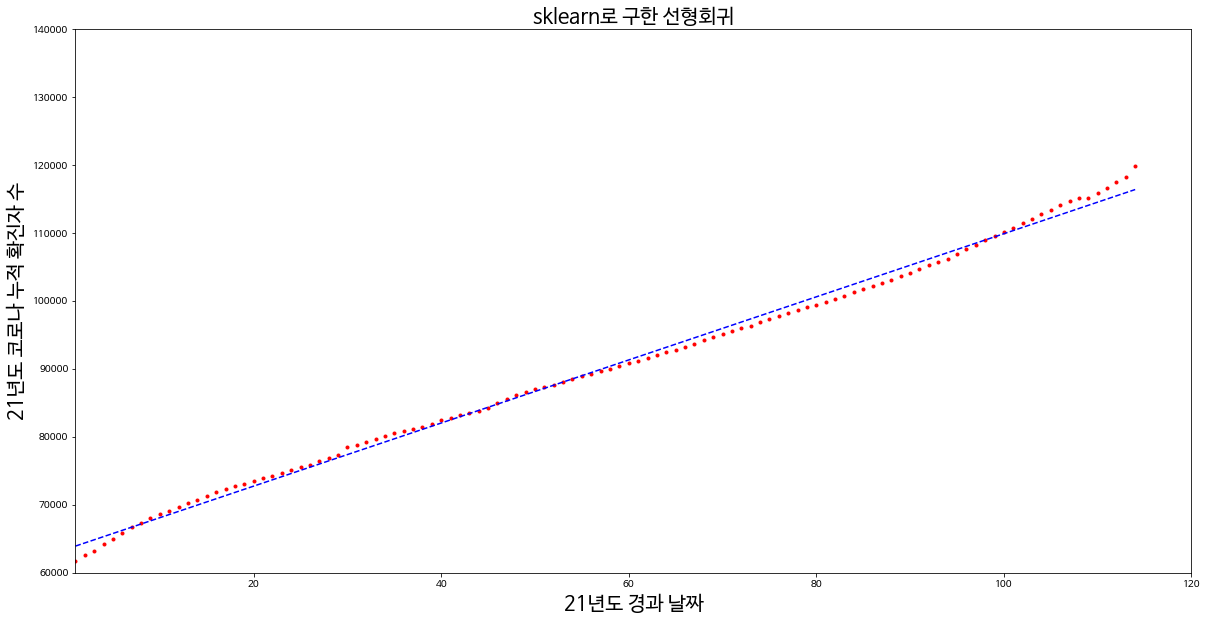

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression
line = LinearRegression()

x = data[['경과 날짜']]
y = data['누적확진자']

line.fit(x, y_data)

W0 = line.coef_[0]
W1 = line.intercept_

#print(W0, W1)

#그리기
print("결과 확인")
print("기울기: ", W0, "y절편: ", W1)
print("직선의 방정식:  y = ",W0,"*x +", W1)
print("오차 제곱: ", mse(x_data,y_data,([W0, W1])))
plt.figure(figsize=(20,10))
plt.title('sklearn로 구한 선형회귀',fontsize = 20)
plt.plot(x_data,y_data, 'ro', markersize = 3)
plt.rc('font', family='NanumBarunGothic')
plt.ylim([60000,140000])
plt.xlim([1,120])
plt.xlabel('21년도 경과 날짜',fontsize=20)
plt.ylabel('21년도 코로나 누적 확진자 수',fontsize=20)
plt.plot(x_data, W0 * x_data + W1,'b--')
plt.show()

In [19]:
print("21년도 코로나 누적확진자수: ",W0*365 + W1)

21년도 코로나 누적확진자수:  232958.0321783682


#경사 하강법(BB 조합)

In [20]:
#평균 제곱 오차 함수의 기울기
def dmse(x,t,w) :
  y = w[0] * x + w[1]
  d_w0 = 2* np.mean((y-t) * x) #w0으로 편미분
  d_w1 = 2* np.mean(y-t) #w1으로 편미분
  return d_w0, d_w1

In [21]:
#경사하강법
def fit_line(x, t) :
  w_init = [463, 63466]
  mu = 0.00001 # 학습률
  i_max = 1000000 # 반복 최대 수
  eps = 0.1 #반복 종료 기울기의 절대값의 한계
  w_i = np.zeros([i_max , 2])
  w_i[0, :] = w_init
  for i in range(1, i_max) :
    df = dmse(x, t, w_i[i-1])
    w_i[i, 0] = w_i[i -1, 0] - mu *df[0] 
    w_i[i, 1] = w_i[i -1, 1] - mu *df[1]
    if max(np.absolute(df)) < eps :
      break
  w0 = w_i[i, 0]
  w1 = w_i[i, 1]
  w_i = w_i[:i ,:]
  return w0, w1, df, w_i


반복 횟수 107773
W=[464.363393, 63466.160143]
dMSE=[0.001310, -0.100000]
MSE = 896009.3227116889


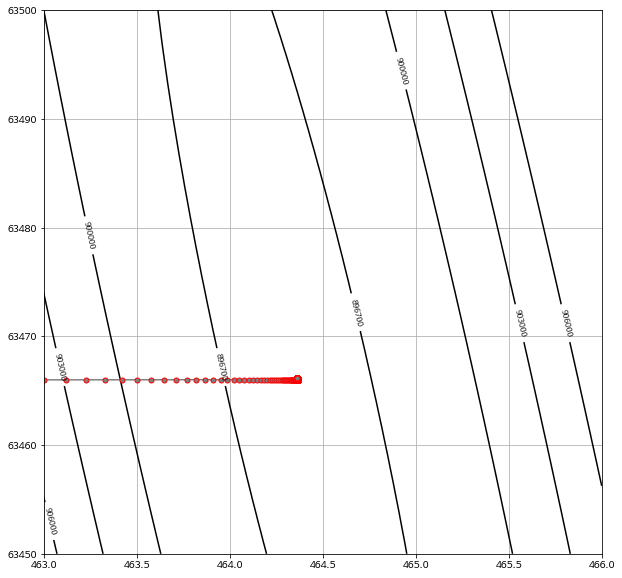

In [22]:
w0 = [463,466]
w1 = [63450, 63500]
#그리기
plt.figure(figsize=(10, 10))
xn = 100
x0 = np.linspace(w0[0], w0[1], xn)
x1 = np.linspace(w1[0], w1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn) :
  for i1 in range(xn) :
    J[i1, i0] = mse(X, Y, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors = 'black',
                   levels = (896700,900000,903000,906000))
cont.clabel(fmt='%1.0f', fontsize = 8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line(X, Y)

print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE = {0:.10f}'.format(mse(X, Y, [W0, W1])))
plt.plot(W_history[:,0], W_history[:, 1], '.-', color = 'gray', markersize = 10, markeredgecolor = 'red')
plt.show()

mu값을 0.00001로 했을 때
반복횟수가 많이 줄어든 것을 확인 할 수 있다.

결과 확인
반복 횟수 10778
기울기 : 464.363393,y절편 : 63466.160153
제곱오차 = 896009.3227107507


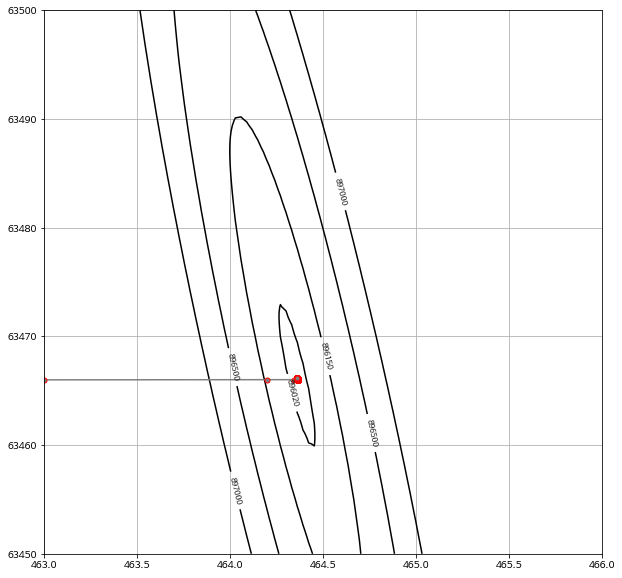

In [23]:
#경사하강법
def fit_line(x, t) :
  w_init = [463, 63466]
  mu = 0.0001 # 학습률
  i_max = 100000 # 반복 최대 수
  eps = 0.1 #반복 종료 기울기의 절대값의 한계
  w_i = np.zeros([i_max , 2])
  w_i[0, :] = w_init
  for i in range(1, i_max) :
    df = dmse(x, t, w_i[i-1])
    w_i[i, 0] = w_i[i -1, 0] - mu *df[0] 
    w_i[i, 1] = w_i[i -1, 1] - mu *df[1]
    if max(np.absolute(df)) < eps :
      break
  w0 = w_i[i, 0]
  w1 = w_i[i, 1]
  w_i = w_i[:i ,:]
  return w0, w1, df, w_i
w0 = [463,466]
w1 = [63450, 63500]
#그리기
plt.figure(figsize=(10, 10))
xn = 100
x0 = np.linspace(w0[0], w0[1], xn)
x1 = np.linspace(w1[0], w1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn) :
  for i1 in range(xn) :
    J[i1, i0] = mse(X, Y, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors = 'black',
                   levels = (896020,896150,896500,897000))
cont.clabel(fmt='%1.0f', fontsize = 8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line(X, Y)
print("결과 확인")
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('기울기 : {0:.6f},y절편 : {1:.6f}'.format(W0,W1))
print('제곱오차 = {0:.10f}'.format(mse(X, Y, [W0, W1])))
plt.plot(W_history[:,0], W_history[:, 1], '.-', color = 'gray', markersize = 10, markeredgecolor = 'red')
plt.show()

결과 확인
직선 : y = 464.363393*x + 63466.160153
기울기(w0): [464.363393,   y 절편(w1): 63466.160153]
제곱오차 =896009.322711


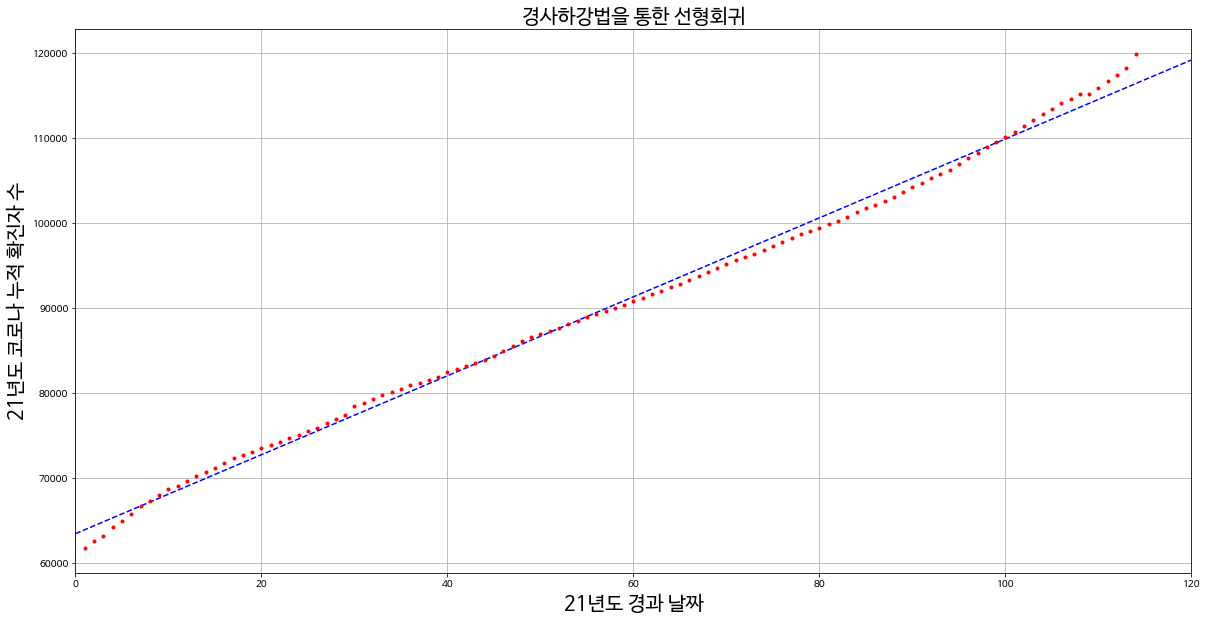

In [24]:
X_min = 0
X_max = 120

def show_line(w) :
  xb = np.linspace(X_min, X_max, 100)
  y = w[0] * xb + w[1]
  plt.plot(xb, y, 'b--')

plt.figure(figsize = (20,10))
W = np.array([W0, W1])
ma = mse(X, Y, W)
print("결과 확인")
print("직선 : y = {0:.6f}*x + {1:.6f}".format(W0,W1))
print("기울기(w0): [{0:.6f},   y 절편(w1): {1:.6f}]".format(W0,W1))
print("제곱오차 ={0:.6f}".format(ma))

show_line(W)
plt.title('경사하강법을 통한 선형회귀',fontsize = 20)
plt.xlabel('21년도 경과 날짜',fontsize=20)
plt.ylabel('21년도 코로나 누적 확진자 수',fontsize=20)
plt.plot(X, Y, 'ro', markersize = 3)
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [25]:
#경사 하강법을 이용하여 2021년 코로나 누적환자수 예측하기
print(round(W0 * 365 + W1,0))

232959.0


#AA방법으로 이용한 선형회귀

AA방법으로 21년 누적 확진자 수를 예측해보자

각각의 변수를 편미분 해주었다.

cf)단순 계산 과정은 excel함수를 이용해서 계산했다(사칙연산)

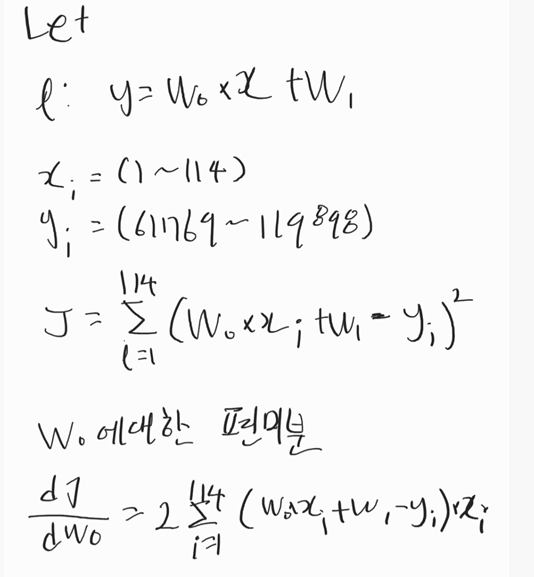

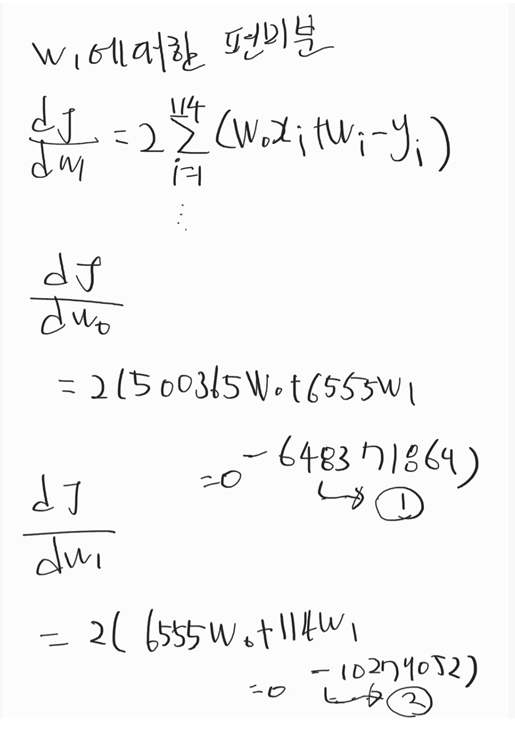

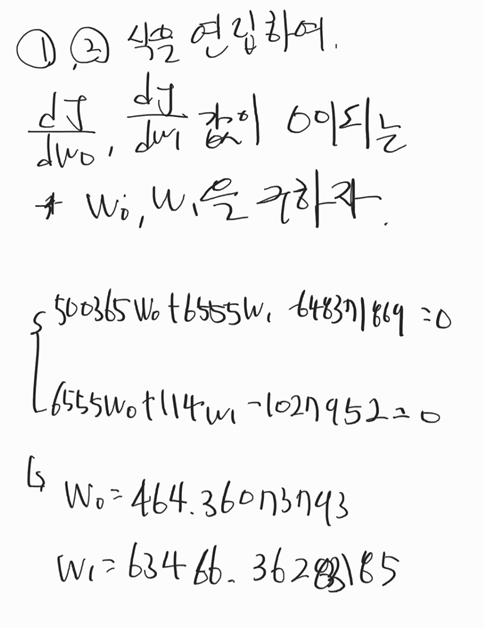

위의 두 식으로 연립방정식을 푼 결과

W0의 값은 464.36073793....

W1의 값은 63466.36283185....

이 됨을 알 수 있었다.

In [26]:
print("AA로 구한 21년도 누적확진자수", round(464.36073793*365 + 63466.36283185))

AA로 구한 21년도 누적확진자수 232958


In [27]:
print("오차 제곱", mse(X, Y, [464.36073793, 63466.36283185]))

오차 제곱 896009.3125755804


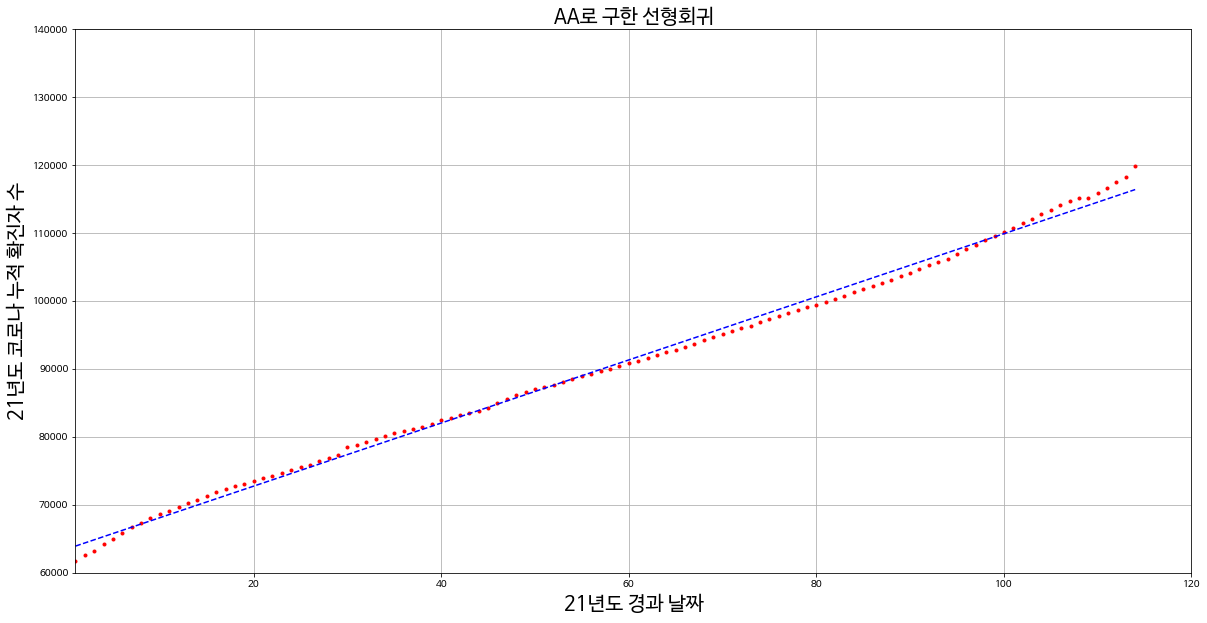

In [28]:
plt.figure(figsize=(20,10))
plt.title('AA로 구한 선형회귀',fontsize = 20)
plt.plot(x_data,y_data, 'ro', markersize = 3)
plt.rc('font', family='NanumBarunGothic')
plt.ylim([60000,140000])
plt.xlim([1,120])
plt.xlabel('21년도 경과 날짜',fontsize=20)
plt.ylabel('21년도 코로나 누적 확진자 수',fontsize=20)
plt.plot(x_data,464.359806*x_data + 63464.433938 , 'b--')
plt.grid()

#구현 결과

결과

numpy로 예측한 누적 코로나 환자수 : 232958

오차 제곱 : 896009.3125755804


텐서플로우로 예측한 누적 코로나 환자수 : 232949

오차 제곱 : 896010.6015886914




사이킷런으로 예측한 누적 코로나 환자수 : 232958

오차 제곱 : 896009.3125755804


경사하강법으로 예측한 누적 코로나 환자수 : 232959

오차 제곱 : 896009.3227107507




AA기법으로 예측한 누적 코로나 환자수 : 232958

오차 제곱 : 896009.3125755804



오차 제곱 비교 : AA == numpy, < 사이킷런 < 경사하강법 < 텐서플로우


21년 12월 31일 코로나 누적 환자수 예측 결과 232958명